In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path

# Helper functions
from helper_functions import get_images, prep_for_train

# Styles for miles
style.use('ggplot')

In [14]:
model_deepfake = keras.Sequential([
  layers.Conv2D(filters = 64, kernel_size = 4, strides = (1, 1), input_shape = (256, 256, 3), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((4, 4)),
  layers.Conv2D(filters = 32, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((4, 4)),
  layers.Conv2D(filters = 16, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((4, 4)),
  layers.Flatten(),
  layers.Dense(units = 4096, activation = 'relu'),
  #layers.Dropout(rate = 0.1),
  layers.Dense(units = 256, activation = 'relu'), 
  layers.Dense(units = 1, activation = 'softmax')
])

In [15]:
model_deepfake.compile(optimizer = SGD(lr=1e-6), 
                       metrics = [keras.metrics.BinaryAccuracy(), 
                                  keras.metrics.Precision(), 
                                  keras.metrics.Recall()],
                       loss = keras.losses.BinaryCrossentropy())

In [16]:
model_deepfake.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 64)      3136      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        32800     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 16)        8208      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [18]:
# TRAIN THAT MODEL!
X, y = prep_for_train(get_images(500, seed=700))
model_fit = model_deepfake.fit(X, y, epochs=5, batch_size=100, validation_data=prep_for_train(get_images(1000, dtype='valid', seed=430)))

Epoch 1/5
5/5 [==============================] - 28s 5s/step - loss: 0.6927 - binary_accuracy: 0.5188 - precision_2: 0.5188 - recall_2: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.4995 - val_precision_2: 0.4995 - val_recall_2: 1.0000
Epoch 2/5
5/5 [==============================] - 20s 4s/step - loss: 0.6930 - binary_accuracy: 0.4978 - precision_2: 0.4978 - recall_2: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.4995 - val_precision_2: 0.4995 - val_recall_2: 1.0000
Epoch 3/5
5/5 [==============================] - 20s 4s/step - loss: 0.6926 - binary_accuracy: 0.5168 - precision_2: 0.5168 - recall_2: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.4995 - val_precision_2: 0.4995 - val_recall_2: 1.0000
Epoch 4/5
5/5 [==============================] - 20s 4s/step - loss: 0.6929 - binary_accuracy: 0.5045 - precision_2: 0.5045 - recall_2: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.4995 - val_precision_2: 0.4995 - val_recall_2: 1.0000
Epoch 5/5
5/5 [=====================

In [26]:
model_fit.history['binary_accuracy']

[0.5030303001403809,
 0.5030303001403809,
 0.5030303001403809,
 0.5030303001403809,
 0.5030303001403809]

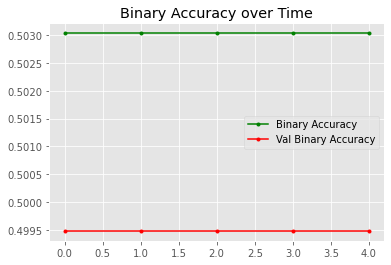

In [21]:
plt.plot(model_fit.history['binary_accuracy'], 'g.-', label = 'Binary Accuracy')
plt.plot(model_fit.history['val_binary_accuracy'], 'r.-', label = 'Val Binary Accuracy')
plt.legend()
plt.title('Binary Accuracy over Time')
plt.show()

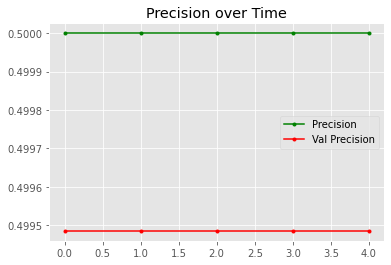

In [17]:
plt.plot(model_fit.history['precision'], 'g.-', label = 'Precision')
plt.plot(model_fit.history['val_precision'], 'r.-', label = 'Val Precision')
plt.legend()
plt.title('Precision over Time')
plt.show()